<div dir=rtl>

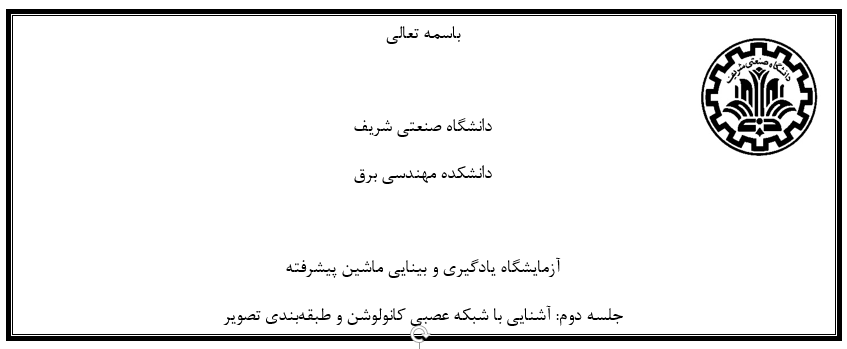

<div dir=rtl>

نام و نام‌خانوادگی: حامد آجورلو

شماره دانشجویی: 97101167

----



<div dir=rtl>

#  آزمايش اول: طبقه‌بندی تصویر - دیتاست mnist 

----



<div dir=rtl>



يکی از مهمترين کاربردهای شبکه‌های عصبی کانولوشن، طبقه‌بندی تصاوير و اختصاص ليبل مناسب به آنها است. در اين بخش به طبقه‌بندی داده‌های ديتاست mnist که شامل اعداد دست‌نويس می‌باشد، پرداخته می‌شود. 



<div dir=rtl>

## 1. رسم داده‌ها
دیتاست mnist را دانلود کنيد و  9 داده ابتدایی داده‌های آموزش را رسم کنید.

11501568/11490434 [==============================] - 0s 0us/step


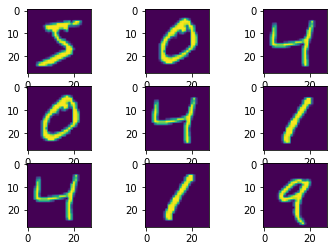

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from keras.utils.np_utils import to_categorical   
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## plot data
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3,3)
for i in range(3):
  for j in range(3): 
    axs[i,j].imshow(X_train[i+j])


<div dir=rtl>

## 2.	طبقه‌بندی براساس شبکه عصبی


يک شبکه عصبی با ساختار زير بسازيد و با استفاده از داده‌های آموزش، پارامترهای آن را محاسبه کنيد.

•	لايه ورودی با تعداد نورون مناسب و فعالساز RELU

•	يک لایه تماما متصل با 10 نورون و فعالساز RELU

•	لایه خروجی با تعداد نورون مناسب و فعالساز softmax 



شبکه حاصل را براساس موارد زير آموزش دهيد:

•	تابع هزینه categorical_crossentropy

•	Batch_size = 200

•	Epoch = 10

•	بهینه‌ساز: Adam

•	معيار: accuracy

خطای حاصل از مدل را محاسبه کنید.


In [ ]:
### neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from keras.utils.np_utils import to_categorical   


###### flattening data
num_pixels = X_train.shape[1] * X_train.shape[1]
x_train_ANN = np.reshape(X_train,(60000,num_pixels))
x_test_ANN = np.reshape(X_test,(10000,num_pixels))

###### normalize
x_train_ANN = x_train_ANN/255
x_test_ANN = x_test_ANN/255

###### output: one-hot vector
y_train_ANN = to_categorical(y_train, num_classes=10)
y_test_ANN = to_categorical(y_test, num_classes=10)
 



# ## simple_model
def ANN_model(optimizer):

  model = Sequential()
  model.add(Dense(12, input_dim=784, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model


# # build the model
model1 = ANN_model("Adam")


# # Fit the model
model1.fit(x_train_ANN, y_train_ANN, epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 4s 3ms/step - loss: 0.9753 - accuracy: 0.6899
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8912
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.9110
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9181
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2614 - accuracy: 0.9252
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.9289
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2349 - accuracy: 0.9321
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2249 - accuracy: 0.9356
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2180 - accuracy: 0.9372
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2112 - accuracy: 0.9393

In [ ]:
# ## evaluate model
y_pred = model1.predict(x_test_ANN)
y_predicted=[]
for i in range(10000):
  y_predicted.append(np.argmax(y_pred[i]))
model1.evaluate(x_test_ANN,y_test_ANN)

313/313 [==============================] - 1s 3ms/step - loss: 0.2244 - accuracy: 0.9372


[0.22439318895339966, 0.9372000098228455]

loss on Test data = 0.2243

In [ ]:
model1.evaluate(x_train_ANN,y_train_ANN)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2020 - accuracy: 0.9420


[0.20198659598827362, 0.9420333504676819]

loss on Train data = 0.2019

می بینیم که شبکه ی معمولی عملکرد خوبی روی داده ی تست و آموزش دارد که نشان از یادگیری مناسب الگوی دیتاست توسط مدل دارد 

<div dir=rtl>

## 3.	طبقه‌بندی براساس شبکه عصبی کانولوشن


يک شبکه عصبی کانولوشن با ساختار زير بسازيد و با استفاده از داده‌های آموزش، پارامترهای آن را محاسبه کنيد.

•	لايه ورودی شامل 30 فيلتر با ابعاد 5×5 با فعالساز RELU

•	يک لایه max pooling

•	یک لایه کانولوشن شامل 10 فیلتر با ابعاد 3×3 با فعالساز RELU

•	یک لایه max pooling

•	يک لایه تماما متصل با 10 نورون و فعالساز RELU

•	لایه خروجی با تعداد نورون مناسب و فعالساز softmax 


شبکه حاصل را براساس موارد زير آموزش دهيد:

•	تابع هزینه categorical_crossentropy

•	Batch_size = 200

•	Epoch = 10

•	بهینه‌ساز: Adam

•	معيار: accuracy

خطای حاصل از مدل را محاسبه کنید.


In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

def load_dataset():

	(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
	x_train_CNN = X_train.reshape((X_train.shape[0], 28, 28, 1))
	x_test_CNN = X_test.reshape((X_test.shape[0], 28, 28, 1))

	Y_train = to_categorical(Y_train,num_classes=10)
	Y_test = to_categorical(Y_test,num_classes=10)
	return x_train_CNN, Y_train, x_test_CNN, Y_test

def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')

	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0

	return train_norm, test_norm

def CNN_model(opt):
  model = Sequential()
  model.add(Conv2D(30, kernel_size=(5, 5),activation='relu',input_shape=(28,28,1),padding='same'))
  model.add(MaxPooling2D((2, 2),padding='same'))
  model.add(Conv2D(10, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model






trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
model = CNN_model("Adam")

model.fit(trainX, trainY , epochs=10, batch_size=200) 



Epoch 1/10
300/300 [==============================] - 11s 10ms/step - loss: 0.7036 - accuracy: 0.7611
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.1791 - accuracy: 0.9466
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 0.1231 - accuracy: 0.9626
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0977 - accuracy: 0.9703
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0838 - accuracy: 0.9746
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0744 - accuracy: 0.9772
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0669 - accuracy: 0.9800
Epoch 8/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0603 - accuracy: 0.9817
Epoch 9/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0563 - accuracy: 0.9825
Epoch 10/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0525 - accuracy: 0.98

In [ ]:
acc=model.evaluate(testX,testY)

313/313 [==============================] - 1s 4ms/step - loss: 0.0503 - accuracy: 0.9831


loss on test Data = 0.0503

In [ ]:
acc=model.evaluate(trainX,trainY)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0458 - accuracy: 0.9856


loss on train Data = 0.0458

می بینیم که شبکه ی کانولوشن عملکرد بهتری نسبت به شبکه ی معمولی روی داده ی تست دارد و دقت بالاتری را ثبت کرده است

In [ ]:
model1=ANN_model("Adam")
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 12)                9420      
                                                                 
 dense_6 (Dense)             (None, 10)                130       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 9,660
Trainable params: 9,660
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model=CNN_model("Adam")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 30)        780       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 10)        2710      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 490)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

<div dir=rtl>

## 4. مقایسه هر دو شبکه

نتایج حاصل و همچنين تعداد پارامترهای هر دو شبکه را مقایسه کنید.


<div dir=rtl>

مقایسه نتایج و توضیحات:

همانطور که ملاحظه می فرمایید شکبه ی کانولوشن با تعداد پارامتر کمتر دقت بالاتری نسبت به شبکه ی معمولی ثبت کرده است و بسیار کاراتر عمل کرده است.

<div dir=rtl>

## 5. آموزش شبکه با الگوریتم sgd

هر دو شبکه را یک بار ديگر و با بهينه‌ساز sgd آموزش دهيد و نتايج حاصل را مقایسه و گزارش دهيد.


In [ ]:
## ANN
# # build the model
model1 = ANN_model("SGD")


# # Fit the model
model1.fit(x_train_ANN, y_train_ANN, epochs=10, batch_size=200)


y_pred = model1.predict(x_test_ANN)
y_predicted=[]
for i in range(10000):
  y_predicted.append(np.argmax(y_pred[i]))

model1.evaluate(x_test_ANN,y_test_ANN)



Epoch 1/10
300/300 [==============================] - 3s 6ms/step - loss: 1.9652 - accuracy: 0.2960
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 1.2730 - accuracy: 0.6126
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.8654 - accuracy: 0.7428
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.6860 - accuracy: 0.7966
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5832 - accuracy: 0.8288
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5157 - accuracy: 0.8500
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4682 - accuracy: 0.8653
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.8763
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4079 - accuracy: 0.8838
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3726 - accuracy: 0.8955

[0.3725515902042389, 0.8955000042915344]

loss on test Data = 0.3725

In [ ]:
print(y_predicted)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 2, 7, 5, 6, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 9, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 9, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 9, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 9, 7, 7, 2, 2, 4, 1, 5, 8, 8, 4, 2, 6, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 3, 7, 7, 3, 1, 8, 1, 8, 0, 3, 0, 1, 9, 7, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 3, 6, 7, 1, 2, 9, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 9, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
## CNN
trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
model = CNN_model("SGD")

model.fit(trainX, trainY , epochs=10, batch_size=200) 
y_pred = model.predict(testX)
y_predicted=[]
for i in range(10000):
  y_predicted.append(np.argmax(y_pred[i]))

model.evaluate(testX,testY)

Epoch 1/10
300/300 [==============================] - 3s 9ms/step - loss: 2.1487 - accuracy: 0.2422
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 1.1055 - accuracy: 0.6427
Epoch 3/10
300/300 [==============================] - 3s 8ms/step - loss: 0.5353 - accuracy: 0.8400
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.4140 - accuracy: 0.8767
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.3561 - accuracy: 0.8945
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.3095 - accuracy: 0.9099
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.2749 - accuracy: 0.9192
Epoch 8/10
300/300 [==============================] - 3s 9ms/step - loss: 0.2477 - accuracy: 0.9265
Epoch 9/10
300/300 [==============================] - 3s 9ms/step - loss: 0.2257 - accuracy: 0.9339
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1834 - accuracy: 0.9491

[0.18338420987129211, 0.9491000175476074]

loss on test Data = 0.1833

In [ ]:
print(y_predicted)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 1, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 1, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

شبکه ی کانولوشن عملکرد بسیار بهتری نسبت به شبکه ی معمولی با استفاده از بهینه گر گرادیان کاهشی تصادفی دارد و دقت بالاتری را ثبت کرده است . گرچه مقدار خطا در هر دو مدل تقریبا در یک رنج مشخص و برابر است.

<div dir=rtl>

## 6. بهبود شبکه

در ساختار شبکه عصبی کانولوشن چه تغییراتی می‌توان ایجاد نمود که منجر به کاهش خطای تست شود؟ 

<div dir=rtl>

 توضیحات:

می توان تعداد لایه ها و تعداد نورون های هر لایه را افزایش داد . این کار می تواند خطای تست را کاهش دهد البته که باید مراقب باشیم که پیچیدگی شبکه بیش از حد نشود تا بیش برازش رخ ندهد.

<div dir=rtl>

#  آزمايش دوم: طبقه‌بندی تصویر - دیتاست cifar10 
----



<div dir=rtl>

طبقه‌بندی تصاوير cifar10 و بررسی اثر data augmentation و dropout

<div dir=rtl>


## 1. رسم داده‌ها
دیتاست cifar10 را دانلود کنيد و 9 داده ابتدایی داده‌های آموزش را رسم کنید.

170508288/170498071 [==============================] - 4s 0us/step


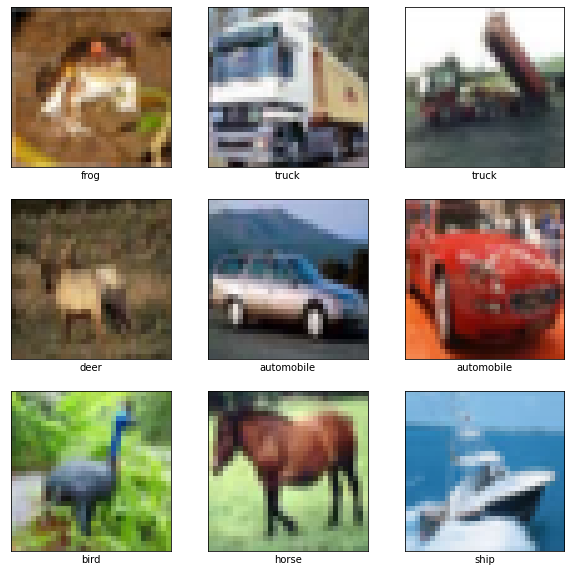

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
plt.figure(figsize=[10,10])
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
for i in range (9):   
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()






<div dir=rtl>

## 2.	طبقه‌بندی بدون استفاده از داده‌افزایی و dropout


يک شبکه عصبی کانولوشن با ساختار زير بسازيد:

•	لايه ورودی شامل 32 فيلتر با ابعاد 3×3 با فعالساز  RELU و حاشیه صفر ‘same’

•	یک لایه batch normalization

•	یک لایه کانولوشن شامل 32 فیلتر با ابعاد 3×3 با فعالساز RELU و حاشیه صفر ‘same’

•	یک لایه batch normalization

•	يک لایه  max pooling با ابعاد 2×2

•	یک لایه کانولوشن شامل 64 فيلتر با ابعاد 3×3 با فعالساز RELU و حاشیه صفر ‘same’

•	یک لایه batch normalization

•	یک لایه کانولوشن شامل 64 فیلتر با ابعاد 3×3 با فعالساز RELU و حاشیه صفر ‘same’

•	یک لایه batch normalization

•	يک لایه max pooling با ابعاد 2×2

•	یک لایه کانولوشن شامل 128 فيلتر با ابعاد 3×3 با فعالساز RELU و حاشیه صفر 
‘same’

•	یک لایه batch normalization

•	یک لایه کانولوشن شامل 128 فیلتر با ابعاد 3×3 با فعالساز RELU و حاشیه صفر ‘same’

•	یک لایه batch normalization

•	يک لایه max pooling با ابعاد 2×2

•	یک لایه flatten

•	يک لایه تماما متصل با 1028 نورون و فعالساز RELU

•	لایه خروجی با تعداد نورون مناسب و فعالساز softmax


شبکه حاصل را براساس موارد زير آموزش دهيد و خطای تست را محاسبه کنید:


•	تابع هزینه sparse_categorical_crossentropy

•	Epoch = 10

•	بهینه‌ساز: Adam

•	معيار: accuracy


In [ ]:
### Whthout dropout and augmentation

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
train_images = train_images / 255
test_images = test_images / 255 

num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)



def CNN_model(opt):
	model = Sequential()
	model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D(pool_size=(2,2)))

	model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D(pool_size=(2,2)))

	model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D(pool_size=(2,2)))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu'))
	model.add(layers.Dense(10, activation='softmax'))    
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# build the model
model = CNN_model("Adam")

model.fit(train_images, train_labels, epochs=10 )





Epoch 1/10
1563/1563 [==============================] - 33s 20ms/step - loss: 1.1662 - accuracy: 0.5858
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7469 - accuracy: 0.7375
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.5911 - accuracy: 0.7942
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.4748 - accuracy: 0.8356
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.3851 - accuracy: 0.8656
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.3027 - accuracy: 0.8940
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.2373 - accuracy: 0.9165
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.1942 - accuracy: 0.9320
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.1589 - accuracy: 0.9440
Epoch 10/10
313/313 [==============================] - 3s 8ms/st

[0.8814334869384766, 0.7918999791145325]

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.8814 - accuracy: 0.7919


[0.8814334869384766, 0.7918999791145325]

loss on test data = 0.8814

<div dir=rtl>

## 3. طبقه‌بندی با استفاده از داده‌افزایی و dropout


با استفاده از تابع ImageDataGenerator، می‌توان داده‌افزايی را بر روی داده‌های آموزش اعمال کرد. با استفاده از این دستور 9 نمونه از تصویرهای ایجاد شده براساس یکی از داده‌ها آموزش را رسم کنید.

با ايجاد مدل داده‌افزايی مناسب و همچنين افزودن لايه dropout به مدل، شبکه را مجدد آموزش دهيد.


In [ ]:
### convolutional neural network
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

## Augmenation - generate data


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


# ## CNN model
def CNN_model(opt):
	model = Sequential()

	model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D(pool_size=(2,2)))
	model.add(layers.Dropout(0.3))

	model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D(pool_size=(2,2)))
	model.add(layers.Dropout(0.5))

	model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D(pool_size=(2,2)))
	model.add(layers.Dropout(0.5))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu'))
	model.add(layers.BatchNormalization())
	model.add(layers.Dropout(0.5))
	model.add(layers.Dense(10, activation='softmax'))    
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# # build the model
model = CNN_model("Adam")

num_classes=10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

data_generator=ImageDataGenerator(width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train)

model.fit_generator(
    train_generator,
    epochs=10
)






Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 52s 32ms/step - loss: 1.7989 - accuracy: 0.3768
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.2909 - accuracy: 0.5376
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0932 - accuracy: 0.6170
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9942 - accuracy: 0.6537
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9248 - accuracy: 0.6783
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8706 - accuracy: 0.6992
Epoch 7/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8302 - accuracy: 0.7139
Epoch 8/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8056 - accuracy: 0.7247
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7775 - accuracy: 0.7324
Epoch 10/10
1563/1563 [==============================] - 51s 32ms/step - lo

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.6244 - accuracy: 0.7874


[0.6244321465492249, 0.7874000072479248]

loss on test data = 0.6244

<div dir=rtl>

## 4.ارزیابی و مقایسه

خطای حاصل از هر دو روش (پیش از داده‌افزايی و افزودن dropout و پس از آن) را مقایسه و گزارش کنید.


<div dir=rtl>

مقایسه نتایج و توضیحات:

با استفاده از داده افزایی و دراپ اوت می بینیم که خطای مدل کاهش یافته است نسبت به زمانی که داده افزایی و دراپ اوت استفاده نکرده ایم . بنابراین روش داده افزایی و دراپ اوت بسیار به کاهش خطای مدل کمک میکند.